In [94]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt


In [95]:
pd_train_data = pd.read_csv("Location446-30cls-5k.lrn.csv")
pd_test_data = pd.read_csv("Location446-30cls-5k.tes.csv")

pd_train_data_X = pd_train_data[pd_train_data.columns[2:]] # remove id and class
pd_test_data_X = pd_test_data[pd_test_data.columns[1:]] # remove id

pd_train_data_Y = pd_train_data[pd_train_data.columns[1]]


pd_train_data = pd_train_data[pd_train_data.columns[1:]]



In [96]:
print(pd_test_data_X.head(10))


   1  2  3  4  5  6  7  8  9  10  ...  437  438  439  440  441  442  443  444  \
0  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    1    0    0    0    0   
1  0  0  0  0  0  0  0  0  1   1  ...    0    0    0    0    0    0    1    0   
2  0  0  0  1  0  0  0  0  0   0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  1  0  0  0  0  0   0  ...    0    0    1    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    1    0    0   
5  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    1    0   
6  0  1  0  0  0  0  0  0  1   0  ...    0    0    0    0    0    0    0    0   
7  0  1  0  1  0  0  0  0  0   1  ...    0    0    0    0    0    0    0    0   
8  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    1    0    0    0   
9  1  0  1  0  0  0  0  0  0   0  ...    0    1    0    0    0    0    0    0   

   445  446  
0    1    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0  
5    0    0  
6    0    

In [97]:
rfc = RandomForestClassifier()
rfc.fit(pd_train_data_X,pd_train_data_Y)
rfc.score(pd_train_data_X,pd_train_data_Y)

1.0

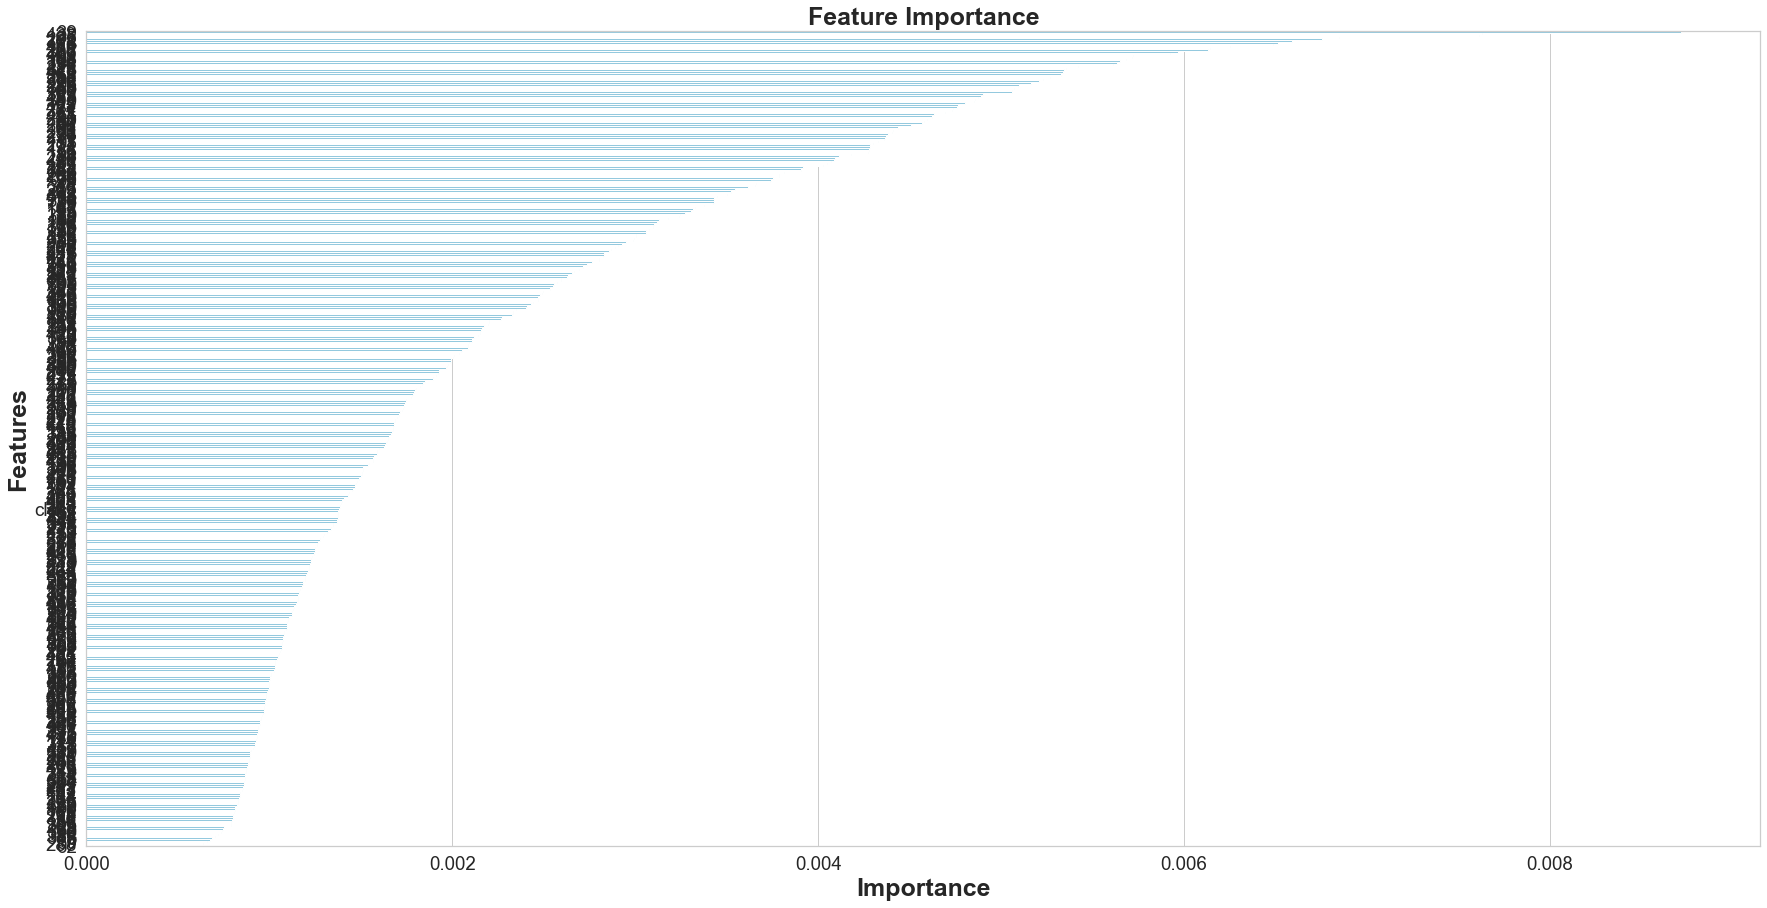

None

,Features,Gini-Importance
0,39,0.008714
1,423,0.007626
2,35,0.007614
3,295,0.006849
4,131,0.006752
5,368,0.006592
6,3,0.006511
7,181,0.006483
8,410,0.006252
9,228,0.006143


In [98]:
feats = {}
for feature, importance in zip(pd_train_data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances.head(24))

In [99]:
pca = PCA(n_components=50)
pd_train_data = pca.fit_transform(pd_train_data_X)
pd_test_data = pca.transform(pd_test_data_X)

In [100]:
rfc = RandomForestClassifier()



n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
             'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        cv = 2)
rs.fit(pd_train_data, pd_train_data_Y)
rs.best_params_


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': False}

In [ ]:
rfc = RandomForestClassifier()



n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
             'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                    verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(pd_train_data, pd_train_data_Y)
rs.best_params_

In [101]:
rfc1 = RandomForestClassifier(n_estimators= 300,
 min_samples_split= 2,
 min_samples_leaf= 12,
 max_features='sqrt',
 max_depth= 12,
 bootstrap= False)

In [102]:
rfc1.fit(pd_train_data, pd_train_data_Y)

RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_leaf=12, n_estimators=300)

In [103]:
results2 = rfc1.predict(pd_test_data)

In [104]:

pd.DataFrame(results2).to_csv('results2.csv')

In [106]:
gnb = GaussianNB()

pred = gnb.fit(pd_train_data, pd_train_data_Y).predict(pd_test_data)

end_time1=time.time()
predictions1= gnb.predict(pd_test_data)

pd.DataFrame(predictions1).to_csv('naivebayes.csv')